# Worksheet 04

Name:  Jiawei Sun

UID: U18507478

### Topics

- Distance & Similarity

### Distance & Similarity

#### Part 1

a) In the minkowski distance, describe what the parameters p and d are.

- p: p-norm
    - represents the order of the norm. It determines the specific type of Minkowski distance being calculated.
- b: dimensions
    - represents the number of dimensions in the space in which you are calculating distances.
    - eg. ``x = [x_1, x_2, ..., x_d]``

b) In your own words describe the difference between the Euclidean distance and the Manhattan distance.

- Euclidean distance
    - p = 2
    - going diagonally
- Manhattan distance
    - p = 1
    - going vertically and horizontally

Consider A = (0, 0) and B = (1, 1). When:

- p = 1, d(A, B) = 2
- p = 2, d(A, B) = $\sqrt{2} = 1.41$
- p = 3, d(A, B) = $2^{1/3} = 1.26$
- p = 4, d(A, B) = $2^{1/4} = 1.19$

c) Describe what you think distance would look like when p is very large.

It would gets smaller and smaller, approaching 1 but never smaller than 1.

d) Is the minkowski distance still a distance function when p < 1? Expain why / why not.

No.

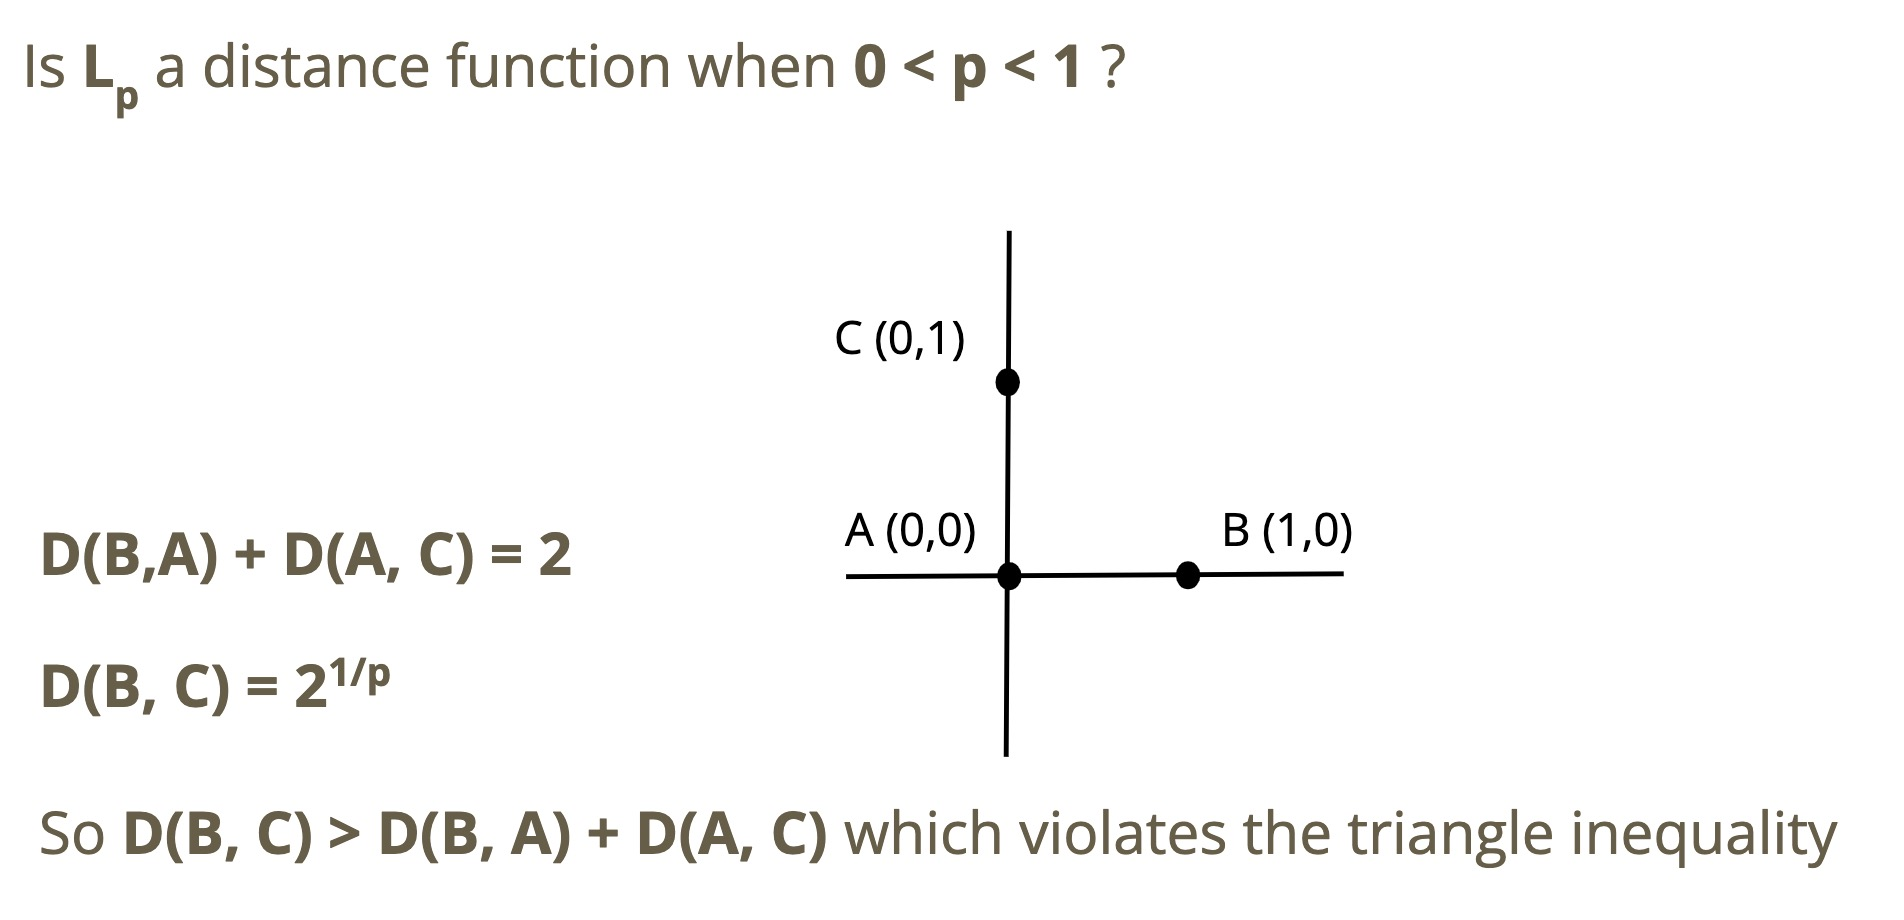

In [2]:
from IPython.display import Image
Image(filename = "d.jpg")

e) when would you use cosine similarity over the euclidan distance?

When direction matters more than magnitude

f) what does the jaccard distance account for that the manhattan distance doesn't?

Size of intersection

#### Part 2

Consider the following two sentences:

In [4]:
s1 = "hello my name is Alice"  
s2 = "hello my name is Bob"

using the union of words from both sentences, we can represent each sentence as a vector. Each element of the vector represents the presence or absence of the word at that index.

In this example, the union of words is ("hello", "my", "name", "is", "Alice", "Bob") so we can represent the above sentences as such:

In [5]:
v1 = [1,    1, 1,   1, 1,    0]
#     hello my name is Alice
v2 = [1,    1, 1,   1, 0, 1]
#     hello my name is    Bob

Programmatically, we can do the following:

In [6]:
corpus = [s1, s2]
all_words = list(set([item for x in corpus for item in x.split()]))
print(all_words)
v1 = [1 if x in s1 else 0 for x in all_words]
print(v1)

['my', 'hello', 'Alice', 'Bob', 'is', 'name']
[1, 1, 1, 0, 1, 1]


Let's add a new sentence to our corpus:

In [7]:
s3 = "hi my name is Claude"
corpus.append(s3)

a) What is the new union of words used to represent s1, s2, and s3?

In [ ]:
("helllo", "hi", "my", "name", "is", "Alice", "Bob", "Claude")

b) Represent s1, s2, and s3 as vectors as above, using this new set of words.

In [28]:
corpus = [s1, s2, s3]
all_words = list(set([item for x in corpus for item in x.split()]))
print(all_words)
v1 = [1 if x in s1 else 0 for x in all_words]
v2 = [1 if x in s2 else 0 for x in all_words]
v3 = [1 if x in s3 else 0 for x in all_words]
print(v1)
print(v2)
print(v3)

['my', 'hello', 'hi', 'Claude', 'Alice', 'Bob', 'is', 'name']
[0, 0, 1, 0, 1, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 1, 1, 1]


c) Write a function that computes the manhattan distance between two vectors. Which pair of vectors are the most similar under that distance function?

In [22]:
def minkowski_dist(x, y, p):
    if p < 1:
        raise ValueError("p must be greater than 1.")
    if len(x) != len(y):
        raise ValueError("x and y are not in the same dimentional space.")
    
    res = 0
    for i in range(len(x)):
        res += abs(x[i]-y[i]) ** p
    return res ** (1/p)


def manhattan_dist(x,y):
    return minkowski_dist(x,y,1)

print(manhattan_dist(v1, v2))
print(manhattan_dist(v1, v3))
print(manhattan_dist(v2, v3))

4.0
7.0
5.0


d) Create a matrix of all these vectors (row major) and add the following sentences in vector form:

- "hi Alice"
- "hello Claude"
- "Bob my name is Claude"
- "hi Claude my name is Alice"
- "hello Bob"

In [26]:
s1 = "hi Alice"
s2 = "hello Claude"
s3 = "Bob my name is Claude"
s4 = "hi Claude my name is Alice"
s5 = "hello Bob"

corpus = [s1, s2, s3, s4, s5]
all_words = list(set([item for x in corpus for item in x.split()]))
print(all_words)
v1 = [1 if x in s1 else 0 for x in all_words]
v2 = [1 if x in s2 else 0 for x in all_words]
v3 = [1 if x in s3 else 0 for x in all_words]
v4 = [1 if x in s4 else 0 for x in all_words]
v5 = [1 if x in s5 else 0 for x in all_words]

matrix = [v1,v2,v3,v4,v5]
for vector in matrix:
    print(vector)

['my', 'hello', 'hi', 'Claude', 'Alice', 'Bob', 'is', 'name']
[0, 0, 1, 0, 1, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 1, 1, 1]
[1, 0, 1, 1, 1, 0, 1, 1]
[0, 1, 0, 0, 0, 1, 0, 0]


e) How many rows and columns does this matrix have?

In [31]:
row = len(matrix)
col = len(matrix[0])

print("number of rows:", row)
print("number of columns:", col)

number of rows: 5
number of columns: 8


f) When using the Manhattan distance, which two sentences are the most similar?

In [29]:
min = manhattan_dist(matrix[0], matrix[1])
for i in range(len(matrix)):
    for j in range(len(matrix)):
        if i != j:
            new_dis = manhattan_dist(matrix[i], matrix[j])
            if min > new_dis:
                min = new_dis

print(min)

2.0
